In [1]:
import numpy as np
import pandas as pd

import geopandas as gpd

import matplotlib.pyplot as plt
%matplotlib inline

Countries we want to look at:
- Uganda ✔️ (FAO)
- Tanzania ✔️ (FAO)
- Democratic Republic of Congo ✔️ (FAO)
- Rwanda ✔️ (FAO)
- Ethiopia ❌
- Burundi ❌
- Malawi ❌
- Zimbabwe ❌

Countries FAO data has:
- Cameroon
- Democratic Republic of Congo
- Kenya
- Rwanda
- Uganda
- Tanzania

### Make a map here of Africa countries in question
- Green for have, red for don't, grey for not analyzing

### Loading price data

In [2]:
#paths to data
cameroon_data_path = './data/raw/cameroon_bean_prices_raw.csv'
drc_data_path = './data/raw/drc_bean_prices_raw.csv'
kenya_data_path = './data/raw/kenya_bean_prices_raw.csv'
rwanda_data_path = './data/raw/rwanda_bean_prices_raw.csv'
tanzania_data_path = './data/raw/tanzania_bean_prices_raw.csv'
uganda_data_path = './data/raw/uganda_bean_prices_raw.csv'

In [3]:
#load in data
cameroon_prices = pd.read_csv(cameroon_data_path)
drc_prices = pd.read_csv(drc_data_path)
kenya_prices = pd.read_csv(kenya_data_path)
rwanda_prices = pd.read_csv(rwanda_data_path)
tanzania_prices = pd.read_csv(tanzania_data_path)
uganda_prices = pd.read_csv(uganda_data_path)

In [4]:
cameroon_prices.head()

,Date-Monthly,"Cameroon, Retail, Bafoussam, Beans (red), USD/kg Commodity Code: 71332","Cameroon, Retail, Bamenda, Beans (red), USD/kg Commodity Code: 71332","Cameroon, Retail, Garoua, Beans (red), USD/kg Commodity Code: 71332","Cameroon, Retail, Yaundé, Beans (red), USD/kg Commodity Code: 71332"
0,Jan-05,0.78,0.58,0.88,0.75
1,Feb-05,0.77,0.54,0.72,0.74
2,Mar-05,0.75,0.57,0.79,0.76
3,Apr-05,0.70,0.53,0.81,0.77
4,May-05,0.69,0.53,0.79,0.75


In [76]:
cameroon_prices.columns

Index(['Date-Monthly',
       'Cameroon, Retail, Bafoussam, Beans (red), USD/kg Commodity Code: 71332 ',
       'Cameroon, Retail, Bamenda, Beans (red), USD/kg Commodity Code: 71332 ',
       'Cameroon, Retail, Garoua, Beans (red), USD/kg Commodity Code: 71332 ',
       'Cameroon, Retail, Yaundé, Beans (red), USD/kg Commodity Code: 71332 '],
      dtype='object')

So each data frame contains prices for different kinds of beans, but all of them have units $\frac{USD}{kg}$. They also each have a time column `Date-Monthly` that we should turn into a [`DatetimeIndex`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html) once we have merged all of the data together.

In [6]:
def plot_prices(df):
    """
    Because all of our bean price dataframes have the same units and time index column,
    we can create a function to plot price against time.
    """
    fig, ax = plt.subplots(figsize=(12, 7))
    df.plot(x='Date-Monthly', ax=ax)
    plt.legend(bbox_to_anchor=(1, 1))
    plt.show()

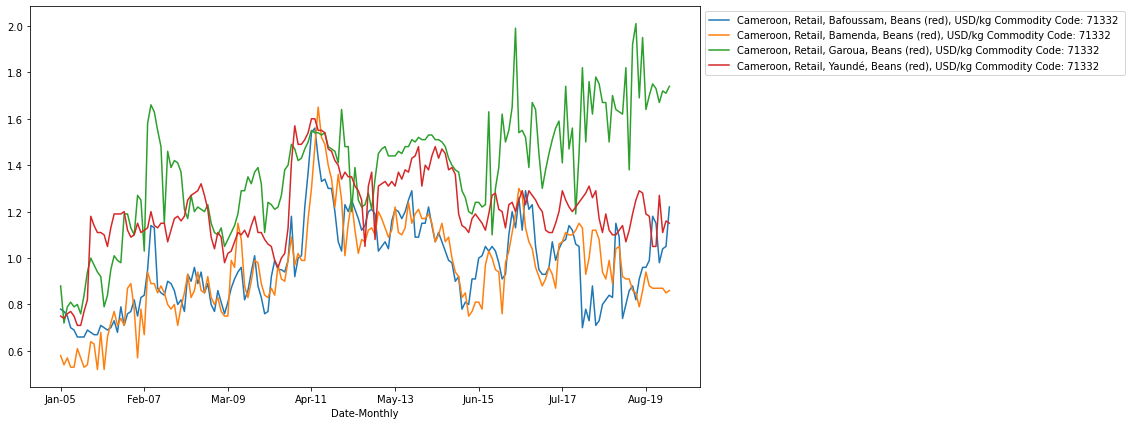

In [7]:
plot_prices(cameroon_prices)

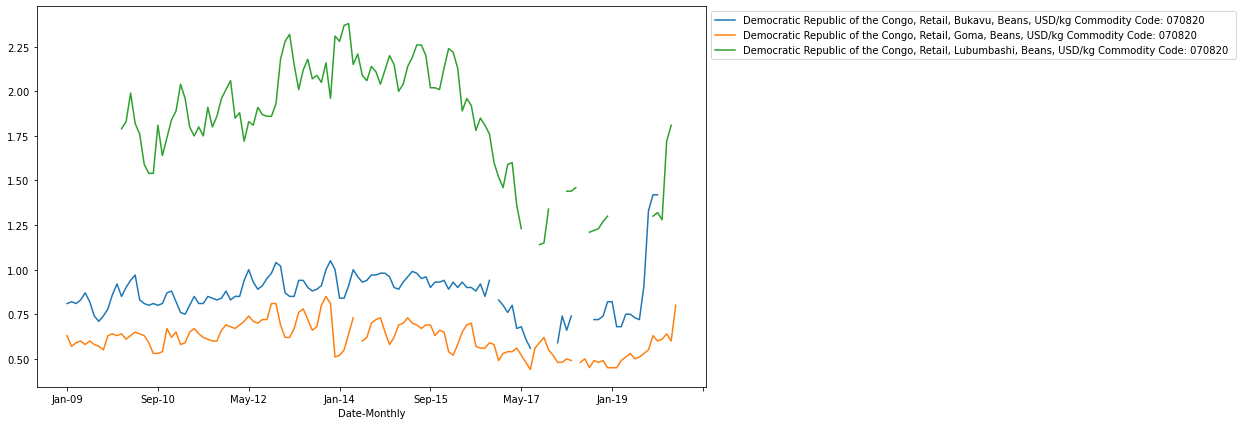

In [8]:
plot_prices(drc_prices)

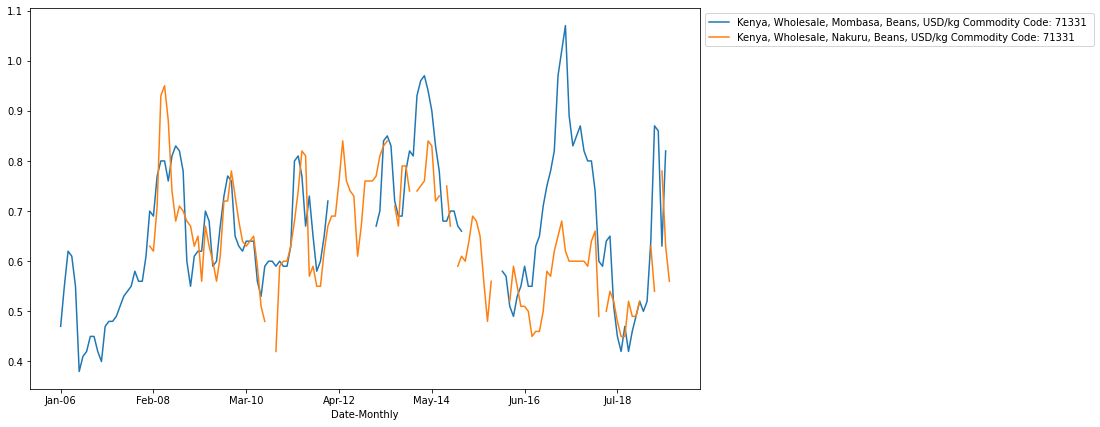

In [9]:
plot_prices(kenya_prices)

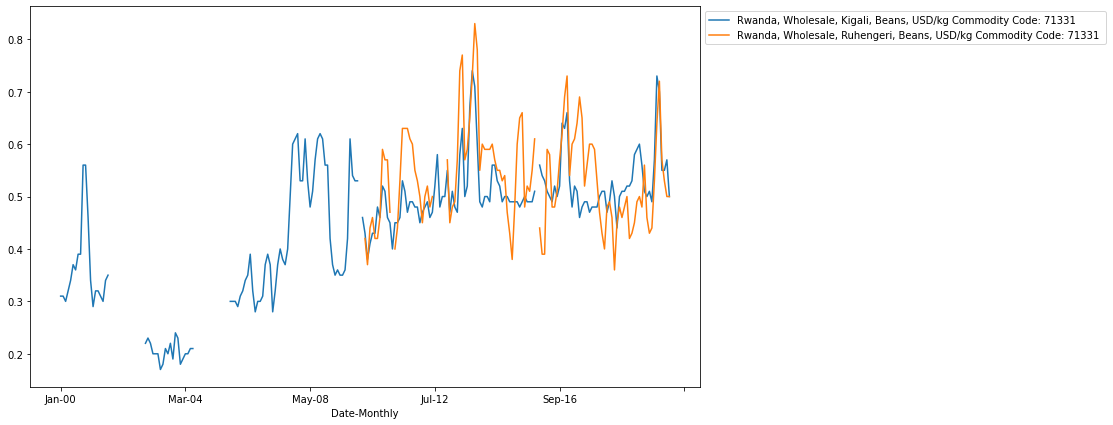

In [10]:
plot_prices(rwanda_prices)

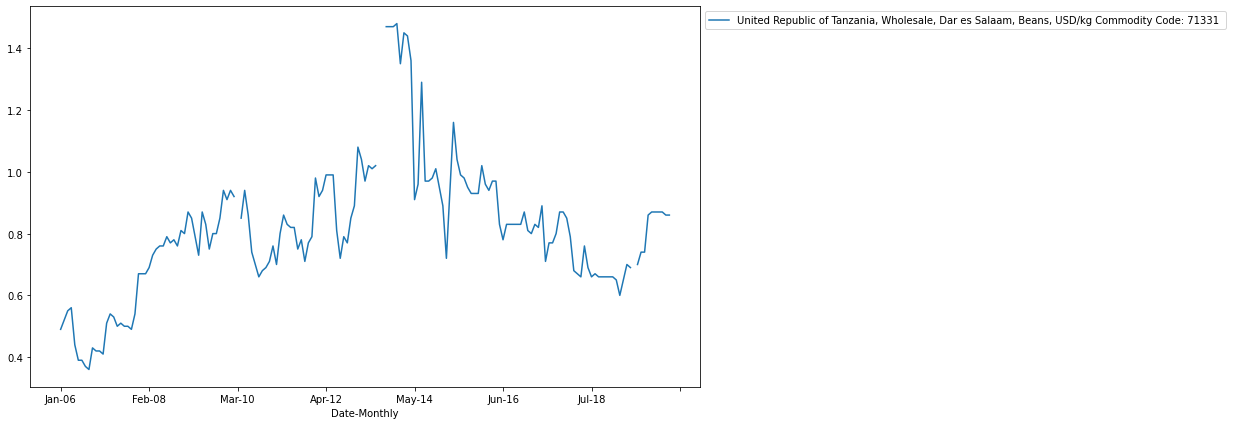

In [11]:
plot_prices(tanzania_prices)

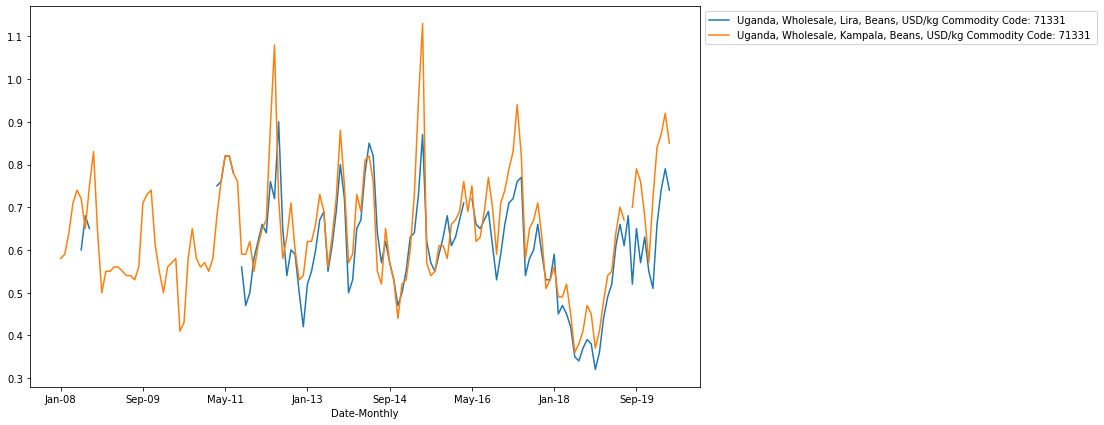

In [12]:
plot_prices(uganda_prices)

### Plotting spatial data that we have

In [13]:
gpd.datasets.available

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

In [65]:
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
print("Geometry Column Name : ", countries.geometry.name)
print("Dataset Size : ", countries.shape)
countries.head()

Geometry Column Name :  geometry
Dataset Size :  (177, 6)


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [67]:
cities = gpd.read_file(gpd.datasets.get_path("naturalearth_cities"))
print("Geometry Column Name : ", cities.geometry.name)
print("Dataset Size : ", cities.shape)
cities.head()

Geometry Column Name :  geometry
Dataset Size :  (202, 2)


,name,geometry
0,Vatican City,POINT (12.45339 41.90328)
1,San Marino,POINT (12.44177 43.93610)
2,Vaduz,POINT (9.51667 47.13372)
3,Luxembourg,POINT (6.13000 49.61166)
4,Palikir,POINT (158.14997 6.91664)


In [78]:
#list of cities we have
cities_list = ['Bafoussam', 'Bamenda', 'Garoua', 'Yaundé', 'Bukavu', 'Goma', 'Lubumbashi', 'Mombasa', 'Nakuru', 'Kigali', 'Ruhengeri', 'Dar es Salaam', 'Lira', 'Kampala']
print(len(cities_list))

cities_subset = cities[cities.name.isin(cities_list)]
print(cities_subset.shape)

14
(3, 2)


In [86]:
#look at getting x,y coordinates for all cities above
print(cities_subset)

              name                   geometry
13          Kigali  POINT (30.05859 -1.95164)
48         Kampala   POINT (32.58138 0.31860)
144  Dar es Salaam  POINT (39.26640 -6.79807)


In [15]:
africa = countries[countries.continent=='Africa']
print("Geometry Column Name : ", africa.geometry.name)
print("Dataset Size : ", africa.shape)
africa.head()

Geometry Column Name :  geometry
Dataset Size :  (51, 6)


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
11,83301151,Africa,Dem. Rep. Congo,COD,66010.0,"POLYGON ((29.34000 -4.49998, 29.51999 -5.41998..."
12,7531386,Africa,Somalia,SOM,4719.0,"POLYGON ((41.58513 -1.68325, 40.99300 -0.85829..."
13,47615739,Africa,Kenya,KEN,152700.0,"POLYGON ((39.20222 -4.67677, 37.76690 -3.67712..."


In [37]:
have_data_list = ['Cameroon', 'Dem. Rep. Congo', 'Kenya', 'Rwanda', 'Tanzania', 'Uganda']
need_data_list = ['Ethiopioa', 'Burundi', 'Malawi', 'Zimbabwe']

have_data = africa[africa.name.isin(have_data_list)]
need_data = africa[africa.name.isin(need_data_list)]

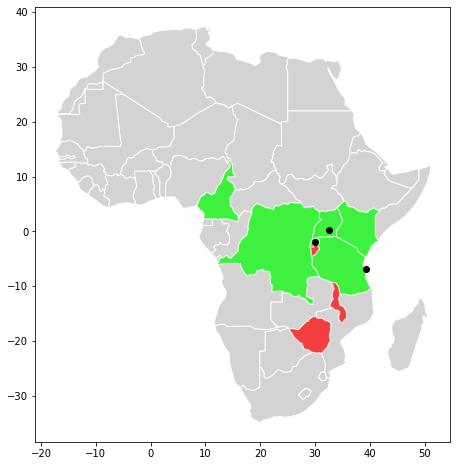

In [89]:
fig, ax = plt.subplots(figsize=(8, 8))

africa.plot(figsize=(8, 8), color='lightgrey', edgecolor='white', ax=ax, label='Not Analyzing')
have_data.plot(color='lime', edgecolor='white', alpha=0.7, ax=ax, label='Have Data')
need_data.plot(color='red', edgecolor='white', alpha=0.7, ax=ax, label='No Data')
cities_subset.plot(color='k', ax=ax)

#ax.legend(bbox_to_anchor=(1, 1)) #currently results in 'No handles with labels found to put in legend.' error
plt.show()

Next steps:
- look at other data source
    - right now, I can't find fertilizer prices at the monthly level, just annual
    - I should look at other data sources for monthly data, but if not start downloading annual data
    - then I could fill the annual data to match the monthly data, because annual data alone results in only ~10-20 data points

**Notes to self:**
- at some point, I will need to merge these data frames or keep them separate and add date to each of them respectively (which could be a pain, but would make the ML portion of this project much easier)
- all dataframes except for Cameroon deal with the broad category of 'beans' (Cameroon seems specific to 'red beans')